In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [54]:
df = pd.read_csv("OSMI 2019 Mental Health in Tech Survey Results - OSMI Mental Health in Tech Survey 2019.csv")

In [55]:
selected_columns = df[['Do you *currently* have a mental health disorder?', 'Have you ever been *diagnosed* with a mental health disorder?', '*If so, what disorder(s) were you diagnosed with?*']]
print(selected_columns)

    Do you *currently* have a mental health disorder?  \
0                                          Don't Know   
1                                            Possibly   
2                                                  No   
3                                                  No   
4                                                  No   
..                                                ...   
347                                          Possibly   
348                                                No   
349                                                No   
350                                          Possibly   
351                                               Yes   

    Have you ever been *diagnosed* with a mental health disorder?  \
0                                                  NaN              
1                                                  NaN              
2                                                  NaN              
3                                      

In [56]:
filtered_current_disorder = selected_columns['Do you *currently* have a mental health disorder?'] != 'etc)'
filtered_diagnosed_disorder = selected_columns['Have you ever been *diagnosed* with a mental health disorder?'] != 'etc)'
filtered_nameof_disorder = selected_columns['*If so, what disorder(s) were you diagnosed with?*'] != 'etc)'

tally_current_disorder = selected_columns[filtered_current_disorder]['Do you *currently* have a mental health disorder?'].value_counts()
tally_diagnosed_disorder = selected_columns[filtered_diagnosed_disorder]['Have you ever been *diagnosed* with a mental health disorder?'].value_counts()
tally_nameof_disorder = selected_columns[filtered_nameof_disorder]['*If so, what disorder(s) were you diagnosed with?*'].value_counts()

print("Tally of current mental health disorder responses:")
print(tally_current_disorder)

print("\nTally of diagnosed mental health disorder responses:")
print(tally_diagnosed_disorder)

print("\nNames of disorders diagnosed:")
print(tally_nameof_disorder)     


Tally of current mental health disorder responses:
Do you *currently* have a mental health disorder?
Yes           147
No            104
Possibly       75
Don't Know     26
Name: count, dtype: int64

Tally of diagnosed mental health disorder responses:
Have you ever been *diagnosed* with a mental health disorder?
Yes    144
No       3
Name: count, dtype: int64

Names of disorders diagnosed:
*If so, what disorder(s) were you diagnosed with?*
Mood Disorder (Depression, Bipolar Disorder, etc)                                                                                                                                                                                                                                                                                                                                                                 19
Mood Disorder (Depression, Bipolar Disorder, etc), Anxiety Disorder (Generalized, Social, Phobia, etc)                                                

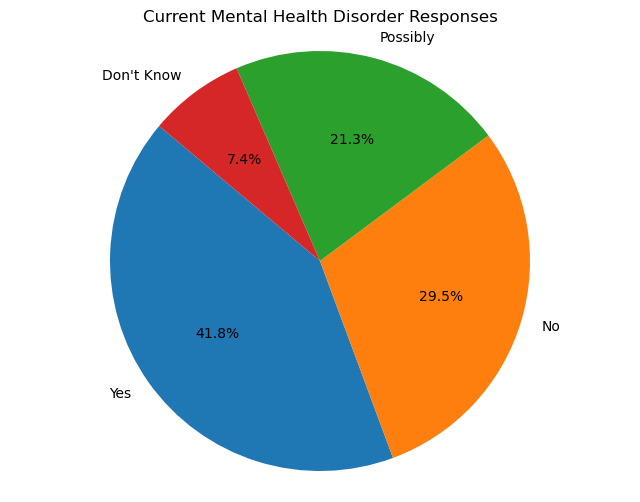

In [57]:
plt.figure(figsize=(8, 6))
plt.pie(tally_current_disorder, labels=tally_current_disorder.index, autopct='%1.1f%%', startangle=140)
plt.title('Current Mental Health Disorder Responses')
plt.axis('equal')
plt.show()


mood disorder (depression                   101
bipolar disorder                            101
anxiety disorder (generalized                98
social                                       98
phobia                                       98
attention deficit hyperactivity disorder     31
post-traumatic stress disorder               23
seasonal affective disorder                   1
dissociative disorder                         6
stress response syndromes                     8
seasonal affect disorder                      1
substance use disorder                        5
obsessive-compulsive disorder                13
eating disorder (anorexia                    14
bulimia                                      14
personality disorder (borderline              5
antisocial                                    5
paranoid                                      5
major depressive disorder                     1
psychotic disorder (schizophrenia             6
schizoaffective                         

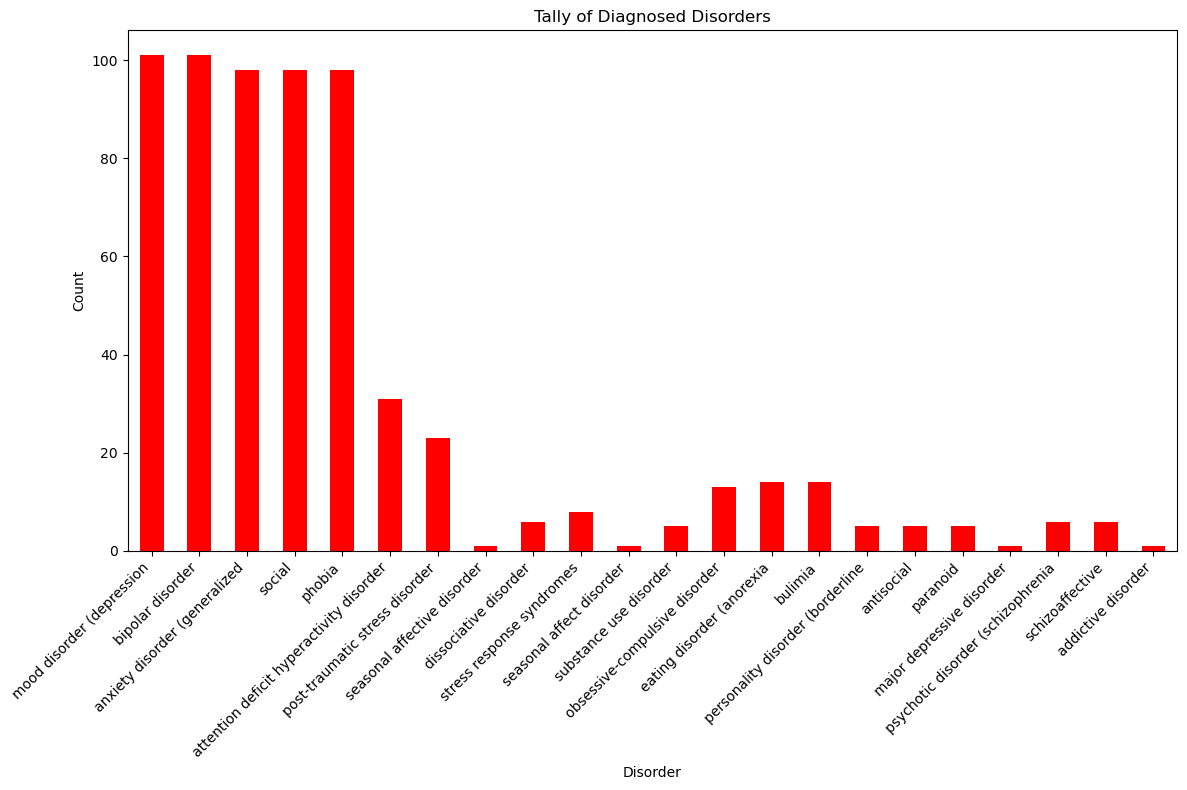

In [66]:
print(tally_nameof_disorder)

plt.figure(figsize=(12, 8))  
tally_nameof_disorder.plot(kind='bar', color='red')
plt.title('Tally of Diagnosed Disorders')
plt.xlabel('Disorder')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()